# Wikipedia2Vec: Word and Entity Embeddings

In [2]:
# Import NumPy
import numpy as np

# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Import PCA from scikit-learn
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# Import Gensim for the word embeddings
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

# Load Word2Vec trained on Google News data
# wv = api.load('word2vec-google-news-300')

# Load Wiki2Vec trained on Wikipedia
wv = KeyedVectors.load_word2vec_format(datapath("enwiki"), binary=False)

## Word Vectors

In [3]:
for i, word in enumerate(wv.vocab):
    if i == 10:
        break
    print(word)

the
in
of
a
and
is
to
was
by
for


In [4]:
vec_king = wv['king']
print(vec_king)

[ 6.290e-02  2.230e-02  4.510e-01 -1.620e-02  3.985e-01 -6.590e-02
  4.334e-01  9.800e-02 -6.105e-01  1.680e-02 -6.200e-02  1.167e-01
  6.125e-01 -7.804e-01  1.250e-01 -1.001e-01 -1.234e-01 -2.259e-01
  2.815e-01  5.150e-02 -2.869e-01 -1.962e-01 -2.072e-01  1.118e-01
 -7.739e-01 -1.102e-01  3.452e-01 -5.316e-01  1.792e-01  5.650e-01
  1.162e-01 -9.440e-02 -2.202e-01  4.636e-01  3.135e-01 -1.856e-01
 -2.852e-01 -1.421e-01  2.247e-01 -6.170e-02 -1.201e-01 -3.090e-02
  3.743e-01  1.347e-01  2.950e-02  2.166e-01 -6.869e-01  6.377e-01
  2.905e-01  6.650e-02  2.993e-01  2.747e-01 -1.418e-01 -1.034e-01
 -3.268e-01 -1.560e-01 -2.698e-01  8.620e-02 -6.706e-01 -5.927e-01
  3.726e-01 -3.735e-01  2.200e-02  4.840e-02  2.411e-01 -1.792e-01
  1.400e-01  6.690e-02 -1.725e-01 -1.923e-01 -3.746e-01  5.210e-02
  1.635e-01  5.229e-01 -2.109e-01 -5.000e-04 -1.261e-01  3.470e-02
  3.800e-02 -1.784e-01  2.044e-01 -5.451e-01  3.420e-01 -1.630e-02
  1.474e-01  5.746e-01  2.365e-01  2.205e-01  4.692e-01  1.333

## Words Similarity

In [5]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.75
'car'	'bicycle'	0.69
'car'	'airplane'	0.57
'car'	'cereal'	0.29
'car'	'communism'	0.20


In [6]:
print(wv.most_similar(positive=['car', 'ENTITY/Batman'], topn=10)) 

[('batmobile', 0.8302738666534424), ('batcycle', 0.7926667928695679), ('ENTITY/Batmobile', 0.7804111838340759), ('batblade', 0.7716271877288818), ('batpod', 0.7674230337142944), ('jokermobile', 0.7542746067047119), ('batcave', 0.7528234720230103), ('batman', 0.7526453137397766), ('ENTITY/Batcave', 0.7499290108680725), ('ENTITY/List_of_Cars_characters#Strip_"The_King"_Weathers', 0.7435188293457031)]


## Word Analogies


In [7]:
def analogy(x1, x2, y1):
    result = wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [8]:
analogy('japan', 'japanese', 'brazil')

'brazilian'

In [9]:
analogy('queen', 'king', 'woman')

'man'

In [10]:
analogy('good', 'fantastic', 'bad')

'strange'

## Visualization

In [16]:
def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
        
def display_closestwords(model, word):
    
    # get close words
    a = model.similar_by_word(word)
    close_words = [w for (w,s) in a]
    close_words.append(word)
    display_pca_scatterplot(model, close_words)


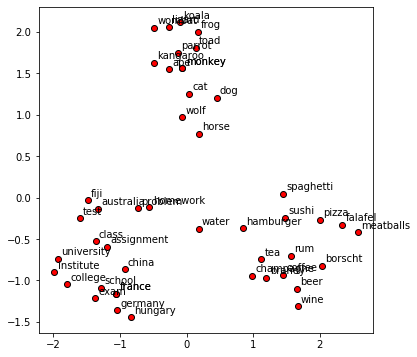

In [17]:
display_pca_scatterplot(wv, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'france', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

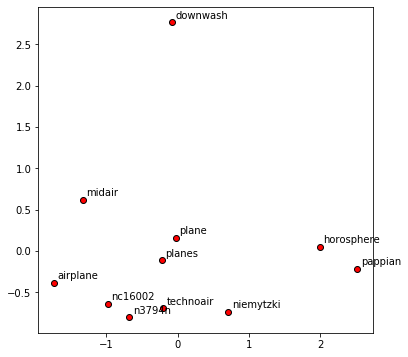

In [18]:
a = display_closestwords(wv, 'plane')